In [1]:
#-*- coding: utf-8 -*-
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy
import os
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print('데이터 세트 Null 값 갯수 \n',df.isnull().sum())

데이터 세트 Null 값 갯수 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [6]:
#모델 구조 생성
model = Sequential()
model.add(Dense(30,  input_dim=29, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 100)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/200
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9895 - val_loss: 0.0253 - val_accuracy: 0.9987

Epoch 00001: val_loss improved from inf to 0.02526, saving model to ./model\01-0.0253.hdf5
Epoch 2/200
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 0.9993

Epoch 00002: val_loss improved from 0.02526 to 0.00775, saving model to ./model\02-0.0078.hdf5
Epoch 3/200
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 0.0077 - val_accuracy: 0.9993

Epoch 00003: val_loss improved from 0.00775 to 0.00769, saving model to ./model\03-0.0077.hdf5
Epoch 4/200
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0065 - val_accuracy: 0.9992

Epoch 00004: val_loss improved from 0.00769 to 0.00651, saving model to ./model\04-0.0065.hdf5
Epoch 5/200
1937/1937 [=================

1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0056 - val_accuracy: 0.9994

Epoch 00040: val_loss did not improve from 0.00375
Epoch 41/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0045 - val_accuracy: 0.9995

Epoch 00041: val_loss did not improve from 0.00375
Epoch 42/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0045 - val_accuracy: 0.9995

Epoch 00042: val_loss did not improve from 0.00375
Epoch 43/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0051 - val_accuracy: 0.9992

Epoch 00043: val_loss did not improve from 0.00375
Epoch 44/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy: 0.9994

Epoch 00044: val_loss did not improve from 0.00375
Epoch 45/200
1937/1937 

1937/1937 [==============================] - 3s 2ms/step - loss: 9.0909e-04 - accuracy: 0.9998 - val_loss: 0.0053 - val_accuracy: 0.9995

Epoch 00081: val_loss did not improve from 0.00375
Epoch 82/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 0.9995

Epoch 00082: val_loss did not improve from 0.00375
Epoch 83/200
1937/1937 [==============================] - 3s 2ms/step - loss: 9.4534e-04 - accuracy: 0.9998 - val_loss: 0.0064 - val_accuracy: 0.9993

Epoch 00083: val_loss did not improve from 0.00375
Epoch 84/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0065 - val_accuracy: 0.9995

Epoch 00084: val_loss did not improve from 0.00375
Epoch 85/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0067 - val_accuracy: 0.9993

Epoch 00085: val_loss did not improve from 0.00375
Epoch 86/200
19

In [8]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 898us/step - loss: 0.0078 - accuracy: 0.9995
[0.007825056090950966, 0.9994850158691406]


In [9]:
predict = model.predict(X)

In [10]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0015686750 0.0
0.0000000005 0.0
0.0003870428 0.0
0.0000000048 0.0
0.0000029293 0.0
0.0000000153 0.0
0.0000000030 0.0
0.0000000002 0.0
0.0000000000 0.0
0.0000000002 0.0


In [11]:
print(Y[541])

1.0


In [12]:
r_count = 0
w_count = 0
for index, i in enumerate(predict):
    if i > 0.5:
        if (Y[index] == 1.0):
            r_count += 1
            print(i, Y[index], 'right')
        else :
            w_count += 1
            print(i, Y[index], 'wrong')
print(r_count, w_count)

[1.] 1.0 right
[0.9969686] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.99774724] 1.0 right
[0.9134822] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.68666625] 1.0 right
[0.91822374] 1.0 right
[0.99920624] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.9847075] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.9999964] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.9923367] 1.0 right
[0.9304861] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.99991953] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.5994768] 0.0 wrong
[0.9956496] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.9999281] 1.0 right
[0.627624] 1.0 right
[0.99961287] 1.0 right
[0.9998023] 1.0 right
[0.99848765] 1.0 right
[0.99994683] 

In [13]:
r_count = 0
w_count = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            r_count += 1
            print(i, predict[index], 'right')
        else :
            w_count += 1
            print(i, predict[index], 'wrong')
print(r_count, w_count)

1.0 [1.] right
1.0 [0.08570296] wrong
1.0 [0.9969686] right
1.0 [0.301267] wrong
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.99774724] right
1.0 [0.9134822] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.68666625] right
1.0 [0.91822374] right
1.0 [0.99920624] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.9847075] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.9999964] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.9923367] right
1.0 [0.9304861] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.99991953] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.09426075] wrong
1.0 [0.00519726] wrong
1.0 [0.9956496] right
1.0 [0.09604016] wrong
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [1.] right
1.0 [0.9999281] right
1.0 [0.6276

In [15]:
scaler= MinMaxScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0


In [17]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [18]:
#모델 구조 생성
model = Sequential()
model.add(Dense(30,  input_dim=29, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 100)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/200
1937/1937 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9404 - val_loss: 0.0044 - val_accuracy: 0.9993

Epoch 00001: val_loss improved from inf to 0.00444, saving model to ./model\01-0.0044.hdf5
Epoch 2/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9993

Epoch 00002: val_loss improved from 0.00444 to 0.00415, saving model to ./model\02-0.0041.hdf5
Epoch 3/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9992

Epoch 00003: val_loss improved from 0.00415 to 0.00399, saving model to ./model\03-0.0040.hdf5
Epoch 4/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9992

Epoch 00004: val_loss did not improve from 0.00399
Epoch 5/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0020 

1937/1937 [==============================] - 3s 2ms/step - loss: 5.7776e-04 - accuracy: 0.9998 - val_loss: 0.0087 - val_accuracy: 0.9994

Epoch 00041: val_loss did not improve from 0.00370
Epoch 42/200
1937/1937 [==============================] - 3s 2ms/step - loss: 6.2028e-04 - accuracy: 0.9998 - val_loss: 0.0089 - val_accuracy: 0.9993

Epoch 00042: val_loss did not improve from 0.00370
Epoch 43/200
1937/1937 [==============================] - 3s 2ms/step - loss: 3.1158e-04 - accuracy: 0.9999 - val_loss: 0.0122 - val_accuracy: 0.9988

Epoch 00043: val_loss did not improve from 0.00370
Epoch 44/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0103 - val_accuracy: 0.9993

Epoch 00044: val_loss did not improve from 0.00370
Epoch 45/200
1937/1937 [==============================] - 3s 2ms/step - loss: 6.5625e-04 - accuracy: 0.9997 - val_loss: 0.0093 - val_accuracy: 0.9993

Epoch 00045: val_loss did not improve from 0.00370
Epoch 4


Epoch 00081: val_loss did not improve from 0.00370
Epoch 82/200
1937/1937 [==============================] - 3s 2ms/step - loss: 5.7782e-04 - accuracy: 0.9999 - val_loss: 0.0138 - val_accuracy: 0.9993

Epoch 00082: val_loss did not improve from 0.00370
Epoch 83/200
1937/1937 [==============================] - 3s 2ms/step - loss: 3.3274e-04 - accuracy: 0.9999 - val_loss: 0.0172 - val_accuracy: 0.9992

Epoch 00083: val_loss did not improve from 0.00370
Epoch 84/200
1937/1937 [==============================] - 3s 2ms/step - loss: 3.7159e-04 - accuracy: 0.9999 - val_loss: 0.0129 - val_accuracy: 0.9994

Epoch 00084: val_loss did not improve from 0.00370
Epoch 85/200
1937/1937 [==============================] - 3s 2ms/step - loss: 2.2227e-04 - accuracy: 0.9999 - val_loss: 0.0135 - val_accuracy: 0.9993

Epoch 00085: val_loss did not improve from 0.00370
Epoch 86/200
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0135 - val_accuracy: 0

In [20]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 883us/step - loss: 0.0100 - accuracy: 0.9994
[0.010041842237114906, 0.9994382262229919]


In [21]:
predict = model.predict(X)

In [22]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000000000 0.0
0.0000000000 0.0
0.0000000000 0.0
0.0000000000 0.0
0.0000000000 0.0
0.0000000000 0.0
0.0000002350 0.0
0.0000000000 0.0
0.0000000000 0.0
0.0000000000 0.0


In [23]:
print(Y[541])

1.0


In [24]:
r_count = 0
w_count = 0
for index, i in enumerate(predict):
    if i > 0.5:
        if (Y[index] == 1.0):
            r_count += 1
            print(i, Y[index], 'right')
        else :
            w_count += 1
            print(i, Y[index], 'wrong')
print(r_count, w_count)

[0.73685086] 0.0 wrong
[0.99999696] 1.0 right
[0.99932885] 1.0 right
[0.9999976] 1.0 right
[0.74550545] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.9999995] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.99999875] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 0.0 wrong
[0.99432516] 1.0 right
[0.99908245] 1.0 right
[1.] 1.0 right
[1.] 0.0 wrong
[1.] 1.0 right
[0.999994] 0.0 wrong
[1.] 1.0 right
[0.99001265] 0.0 wrong
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.7454646] 0.0 wrong
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[1.] 1.0 right
[0.999999

In [26]:
r_count = 0
w_count = 0
pred_r = 0
pred_w = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            r_count += 1
        else :
            w_count += 1
    if predict[index] > 0.5:
        pred_r += 1
    else:
        pred_w += 1
print(r_count, w_count, pred_r, pred_w)

440 52 474 284333


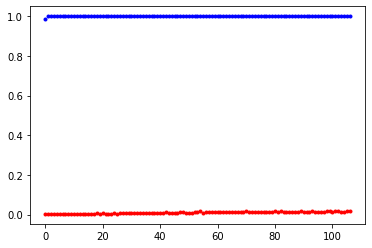

In [28]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()